In [25]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt



In [26]:
df = pd.read_csv('Meta-Critic Whisky Database – Selfbuilts Whisky Analysis.csv')

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Whisky         1812 non-null   object 
 1   Meta Critic    1812 non-null   float64
 2   STDEV          1812 non-null   float64
 3   #              1812 non-null   int64  
 4   Cost           1809 non-null   object 
 5   Class          1812 non-null   object 
 6   Super Cluster  1212 non-null   object 
 7   Cluster        1492 non-null   object 
 8   Country        1812 non-null   object 
 9   Type           1812 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 141.7+ KB


In [28]:
df.head(15)

,Whisky,Meta Critic,STDEV,#,Cost,Class,Super Cluster,Cluster,Country,Type
0,"Macallan 10yo Full Proof 57% 1980 (OB, Giovine...",9.58,0.25,3,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
1,Ledaig 42yo Dusgadh,9.48,0.19,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
2,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.42,0.24,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
3,Glenfarclas 40yo,9.29,0.26,17,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
4,Amrut Spectrum (Batch 1),9.21,0.25,14,$$$$$,SingleMalt-like,ABC,C,India,Malt
5,Glengoyne 25yo,9.20,0.28,22,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
6,Highland Park 25yo,9.18,0.18,19,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
7,Highland Park 40yo,9.16,0.44,10,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
8,Tamdhu 30yo (MacPhail Collection 2009),9.16,0.19,3,$$$$$,SingleMalt-like,ABC,A,Scotland,Malt
9,Balvenie TUN 1401 (all batches),9.15,0.31,19,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt


In [29]:
# Function to extract age
def extract_age(whisky_name):
    match = re.search(r'(\d{1,2})yo', whisky_name)
    return int(match.group(1)) if match else None

# create an 'Age' column
df['Age'] = df['Whisky'].apply(extract_age)

In [30]:
df.head(15)

,Whisky,Meta Critic,STDEV,#,Cost,Class,Super Cluster,Cluster,Country,Type,Age
0,"Macallan 10yo Full Proof 57% 1980 (OB, Giovine...",9.58,0.25,3,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt,10.0
1,Ledaig 42yo Dusgadh,9.48,0.19,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt,42.0
2,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.42,0.24,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt,27.0
3,Glenfarclas 40yo,9.29,0.26,17,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt,40.0
4,Amrut Spectrum (Batch 1),9.21,0.25,14,$$$$$,SingleMalt-like,ABC,C,India,Malt,NaN
5,Glengoyne 25yo,9.20,0.28,22,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt,25.0
6,Highland Park 25yo,9.18,0.18,19,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt,25.0
7,Highland Park 40yo,9.16,0.44,10,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt,40.0
8,Tamdhu 30yo (MacPhail Collection 2009),9.16,0.19,3,$$$$$,SingleMalt-like,ABC,A,Scotland,Malt,30.0
9,Balvenie TUN 1401 (all batches),9.15,0.31,19,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt,NaN


In [31]:
# Break down the 'Cluster' features using the dataset description from the source website
cluster_characteristics = {
    'A': ['Full-bodied', 'sweet', 'pronounced sherry', 'fruity', 'honey', 'spicy'],
    'B': ['Full-bodied', 'sweet', 'pronounced sherry', 'fruity', 'floral', 'malty', 'honey', 'spicy'],
    'C': ['Full-bodied', 'sweet', 'pronounced sherry', 'fruity', 'floral', 'nutty', 'spicy', 'smoky'],
    'E': ['Medium-bodied', 'medium-sweet', 'fruity', 'honey', 'malty', 'wines', 'smoky', 'spicy'],
    'F': ['Full-bodied', 'sweet', 'malty', 'fruity', 'spicy', 'smoky'],
    'G': ['Light-bodied', 'sweet', 'apéritif-style', 'honey', 'floral', 'fruity', 'spicy'],
    'H': ['Very light-bodied', 'sweet', 'apéritif-style', 'malty', 'fruity', 'floral'],
    'I': ['Medium-bodied', 'medium-sweet', 'smoky', 'medicinal', 'spicy', 'fruity', 'nutty'],
    'J': ['Full-bodied', 'dry', 'very smoky', 'pungent', 'medicinal', 'spicy', 'malty', 'fruity']
}

# Create new columns for each flavor profile
for cluster, characteristics in cluster_characteristics.items():
    for feature in characteristics:
        df[f"{feature}"] = df['Cluster'].apply(lambda x: 1 if x == cluster else 0)

# Drop the 'Cluster' column
df.drop(columns=['Cluster'], inplace=True)

In [32]:
df.describe()

,Meta Critic,STDEV,#,Age,Full-bodied,sweet,pronounced sherry,fruity,honey,spicy,...,Medium-bodied,medium-sweet,wines,Light-bodied,apéritif-style,Very light-bodied,medicinal,dry,very smoky,pungent
count,1812.000000,1812.000000,1812.000000,661.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,...,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,8.554785,0.383433,11.026490,15.701967,0.076159,0.040287,0.123068,0.076159,0.081678,0.076159,...,0.102097,0.102097,0.131898,0.081678,0.040287,0.040287,0.076159,0.076159,0.076159,0.076159
std,0.396355,0.193726,6.990991,7.005008,0.265325,0.196686,0.328606,0.265325,0.273949,0.265325,...,0.302860,0.302860,0.338474,0.273949,0.196686,0.196686,0.265325,0.265325,0.265325,0.265325
min,6.470000,0.010000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.337500,0.267500,5.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.610000,0.350000,9.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.830000,0.460000,15.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.580000,2.640000,34.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# function to create cost categories
def map_cost_to_category(cost_symbol):
    if cost_symbol == '$':
        return 1  # Less than $30 CAD
    elif cost_symbol == '$$':
        return 2  # $30 to $50 CAD
    elif cost_symbol == '$$$':
        return 3  # $50 to $70 CAD
    elif cost_symbol == '$$$$':
        return 4  # $70 to $125 CAD
    elif cost_symbol == '$$$$$':
        return 5  # $125 to $300 CAD
    elif cost_symbol == '$$$$$+':
        return 6  # More than $300 CAD
    else:
        return None  # Unknown

# create a 'Cost_Category' column
df['Cost_Category'] = df['Cost'].apply(map_cost_to_category)

# Drop the 'Cost' column
df.drop(columns=['Cost','Whisky','#','STDEV','Super Cluster'], inplace=True)

In [34]:
df.head(15)

,Meta Critic,Class,Country,Type,Age,Full-bodied,sweet,pronounced sherry,fruity,honey,...,medium-sweet,wines,Light-bodied,apéritif-style,Very light-bodied,medicinal,dry,very smoky,pungent,Cost_Category
0,9.58,SingleMalt-like,Scotland,Malt,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
1,9.48,SingleMalt-like,Scotland,Malt,42.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
2,9.42,SingleMalt-like,Scotland,Malt,27.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
3,9.29,SingleMalt-like,Scotland,Malt,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
4,9.21,SingleMalt-like,India,Malt,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.0
5,9.20,SingleMalt-like,Scotland,Malt,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
6,9.18,SingleMalt-like,Scotland,Malt,25.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
7,9.16,SingleMalt-like,Scotland,Malt,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
8,9.16,SingleMalt-like,Scotland,Malt,30.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
9,9.15,SingleMalt-like,Scotland,Malt,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Meta Critic        1812 non-null   float64
 1   Class              1812 non-null   object 
 2   Country            1812 non-null   object 
 3   Type               1812 non-null   object 
 4   Age                661 non-null    float64
 5   Full-bodied        1812 non-null   int64  
 6   sweet              1812 non-null   int64  
 7   pronounced sherry  1812 non-null   int64  
 8   fruity             1812 non-null   int64  
 9   honey              1812 non-null   int64  
 10  spicy              1812 non-null   int64  
 11  floral             1812 non-null   int64  
 12  malty              1812 non-null   int64  
 13  nutty              1812 non-null   int64  
 14  smoky              1812 non-null   int64  
 15  Medium-bodied      1812 non-null   int64  
 16  medium-sweet       1812 

In [36]:
# Convert object features to numerical
label_encoder = LabelEncoder()
categorical_columns = ['Class', 'Country', 'Type']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [37]:
df.head()

,Meta Critic,Class,Country,Type,Age,Full-bodied,sweet,pronounced sherry,fruity,honey,...,medium-sweet,wines,Light-bodied,apéritif-style,Very light-bodied,medicinal,dry,very smoky,pungent,Cost_Category
0,9.58,3,9,5,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
1,9.48,3,9,5,42.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
2,9.42,3,9,5,27.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
3,9.29,3,9,5,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
4,9.21,3,5,5,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.0


In [38]:
# Fill 'Age' with mean and drop any rows that include null values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(inplace=True)

<ipython-input-38-4b147d1543c5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1809 entries, 0 to 1811
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Meta Critic        1809 non-null   float64
 1   Class              1809 non-null   int64  
 2   Country            1809 non-null   int64  
 3   Type               1809 non-null   int64  
 4   Age                1809 non-null   float64
 5   Full-bodied        1809 non-null   int64  
 6   sweet              1809 non-null   int64  
 7   pronounced sherry  1809 non-null   int64  
 8   fruity             1809 non-null   int64  
 9   honey              1809 non-null   int64  
 10  spicy              1809 non-null   int64  
 11  floral             1809 non-null   int64  
 12  malty              1809 non-null   int64  
 13  nutty              1809 non-null   int64  
 14  smoky              1809 non-null   int64  
 15  Medium-bodied      1809 non-null   int64  
 16  medium-sweet       1809 non-n

In [40]:
# Selecting numerical columns for scaling
numeric_columns = ['Meta Critic','Age', 'Cost_Category']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [41]:
df.head()

,Meta Critic,Class,Country,Type,Age,Full-bodied,sweet,pronounced sherry,fruity,honey,...,medium-sweet,wines,Light-bodied,apéritif-style,Very light-bodied,medicinal,dry,very smoky,pungent,Cost_Category
0,2.585091,3,9,5,-1.349030,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.651520
1,2.332865,3,9,5,6.217677,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.651520
2,2.181529,3,9,5,2.670783,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.651520
3,1.853635,3,9,5,5.744758,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.651520
4,1.651853,3,5,5,-0.000745,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.883104


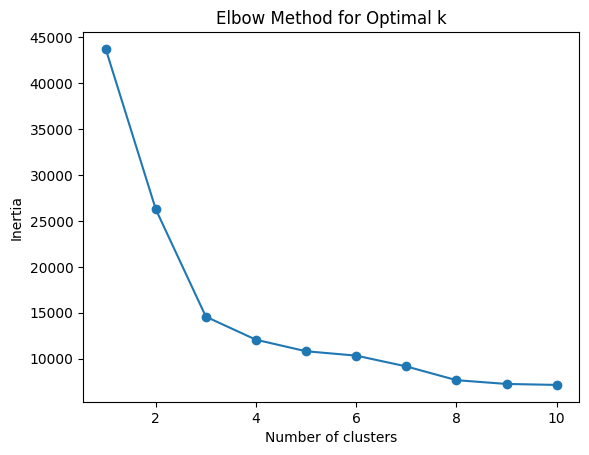

In [42]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [43]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [44]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Meta Critic     Class    Country      Type       Age  Full-bodied  \
Cluster                                                                      
0           0.143974  2.992667   8.780018  4.999083  0.055037     0.124656   
1          -0.300380  1.513043   1.078261  2.569565  0.064386     0.004348   
2          -0.748869  2.147651   7.818792  1.040268 -0.047838     0.000000   
3           0.069597  0.604720  14.879056  3.132743 -0.199783     0.002950   

            sweet  pronounced sherry    fruity     honey  ...  medium-sweet  \
Cluster                                                   ...                 
0        0.065078           0.193401  0.124656  0.103575  ...      0.156737   
1        0.008696           0.013043  0.004348  0.082609  ...      0.039130   
2        0.000000           0.020134  0.000000  0.046980  ...      0.000000   
3        0.000000           0.017699  0.002950  0.026549  ...      0.014749   

            wines  Light-bodied  apéritif-style  Very li

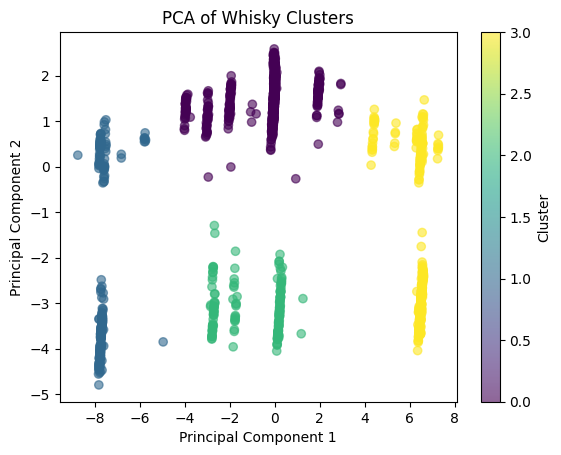

In [45]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(df)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA of Whisky Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

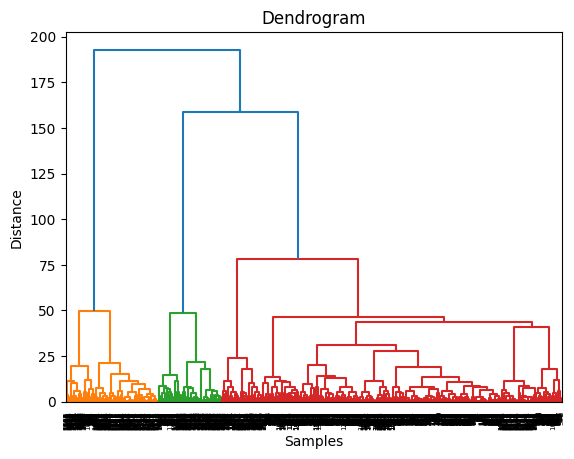

In [24]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()